In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


print("setup ok")


setup ok


In [2]:
df=pd.read_csv("../Data/Task 3 and 4_Loan_Data.csv",index_col=0)
df.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
customer_id,,,,,,,
8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [3]:
X=df.copy()
y=X.pop("default")

X['loan_to_income']=X['loan_amt_outstanding']/X['income']
#X['debt_to_income']=X['total_debt_outstanding']/X['income']
#X['load_to_debt']=X['loan_amt_outstanding']/X['total_debt_outstanding']


Text(0.5, 0, 'Mutual Information Score')

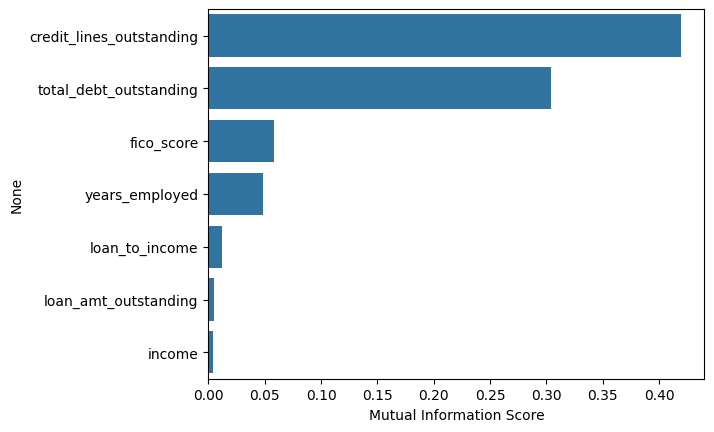

In [4]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
sns.barplot(x=mi_scores, y=mi_scores.index)
plt.xlabel("Mutual Information Score")

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [6]:
# Define the model
model = XGBRegressor(n_estimators=10000, learning_rate=0.001, n_jobs=2) # Your code here

# Fit the model
model.fit(X_train, y_train) # Your code here

# Get predictions
y_prob = model.predict(X_valid) # Your code here

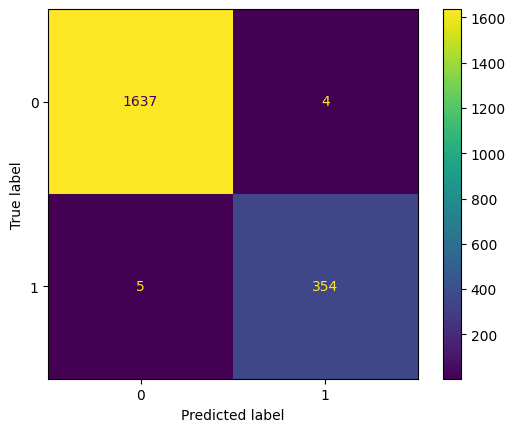

In [7]:
y_pred = (y_prob >= 0.5).astype(int)
cm = confusion_matrix(y_valid, y_pred)

fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_valid, y_pred, ax=ax)

In [8]:
#prediction on one sample
sample = X_valid.iloc[0]
sample_prob = model.predict(sample.values.reshape(1,-1))
print("Predicted probability of default for the sample:", sample_prob[0] if sample_prob[0]>=0 else 0)

Predicted probability of default for the sample: 0
